In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import seaborn as sns

## Data Loading

In [2]:
dataset = pd.read_csv('dataset.csv')

## Examining the Data

In [3]:
dataset

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

The data types that are used are either one of these: int64, float64, object. Also, from the "Non-Null Count", it can be seen that there are null values in almost all of the columns.

Now, let us examine the data in two parts: numeric part and non-numeric part.

In [7]:
categorical_dataset = dataset.select_dtypes("object")
numeric_dataset = dataset.select_dtypes(exclude=["object"])

In [8]:
categorical_dataset

,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,Caucasian,M,Floor,admit,CTICU,Sepsis,Cardiovascular
1,Caucasian,F,Floor,admit,Med-Surg ICU,Respiratory,Respiratory
2,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
3,Caucasian,F,Operating Room / Recovery,admit,CTICU,Cardiovascular,Cardiovascular
4,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Trauma,Trauma
...,...,...,...,...,...,...,...
91708,Caucasian,M,Floor,admit,Cardiac ICU,Sepsis,Cardiovascular
91709,Caucasian,F,Floor,admit,Med-Surg ICU,Sepsis,Cardiovascular
91710,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
91711,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,Respiratory,Respiratory


In [9]:
numeric_dataset

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,180.3,92,0.541667,73.9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0
1,114252,59342,81,77.0,27.420000,0,160.0,90,0.927778,70.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0
2,119783,50777,118,25.0,31.950000,0,172.7,93,0.000694,95.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
3,79267,46918,118,81.0,22.640000,1,165.1,92,0.000694,61.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
4,92056,34377,33,19.0,NaN,0,188.0,91,0.073611,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,177.8,927,0.298611,72.9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,0
91709,66119,13486,121,56.0,47.179671,0,183.0,925,0.120139,158.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
91710,8981,58179,195,48.0,27.236914,0,170.2,908,0.046528,78.9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0
91711,33776,120598,66,NaN,23.297481,0,154.9,922,0.081944,55.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0


All the data are divided correctly since originally 85 columns exist and numeric ones have 78, categorical ones have 7 columns.

### Categoric Data Examination

In [13]:
categorical_dataset.describe()

,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
count,90318,91688,91601,91713,91713,90051,90051
unique,6,2,5,3,8,11,10
top,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Cardiovascular,Cardiovascular
freq,70684,49469,54060,86183,50586,29999,38816


From "count" column, we know the columns that contain no null values are "icu_type" and "icu_stay_type". Aside from these, the others contain null values no more than 2000.

From "unique" column, it is understood that there are no one-valued column that can be dropped.

Let us see the most frequent value's percentile for each column.

In [41]:
frequencies = categorical_dataset.describe().loc["freq"] / categorical_dataset.describe().loc["count"]
frequency_categorical = pd.DataFrame(frequencies).transpose().rename(index={0:'freq'})  #so that the indexes can be columns
frequency_categorical

,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
freq,0.782613,0.539536,0.590168,0.939703,0.551568,0.333133,0.431045


The percentages of "ethnicity" and "icu_stay_type" show us that these values may not be distributed balanced. So, methods such as bootstrap may work for this case.

In [44]:
frequency_tops = frequency_categorical.append(categorical_dataset.describe().loc["top"])
frequency_tops

,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
freq,0.782613,0.539536,0.590168,0.939703,0.551568,0.333133,0.431045
top,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Cardiovascular,Cardiovascular


Lastly, let us see the unique values of each column.

In [45]:
for column in categorical_dataset:
  print(column , categorical_dataset[column].unique())

ethnicity ['Caucasian' nan 'Hispanic' 'African American' 'Asian' 'Native American'
 'Other/Unknown']
gender ['M' 'F' nan]
icu_admit_source ['Floor' 'Accident & Emergency' 'Operating Room / Recovery'
 'Other Hospital' 'Other ICU' nan]
icu_stay_type ['admit' 'readmit' 'transfer']
icu_type ['CTICU' 'Med-Surg ICU' 'CCU-CTICU' 'Neuro ICU' 'MICU' 'SICU'
 'Cardiac ICU' 'CSICU']
apache_3j_bodysystem ['Sepsis' 'Respiratory' 'Metabolic' 'Cardiovascular' 'Trauma'
 'Neurological' 'Gastrointestinal' 'Genitourinary' nan 'Hematological'
 'Musculoskeletal/Skin' 'Gynecological']
apache_2_bodysystem ['Cardiovascular' 'Respiratory' 'Metabolic' 'Trauma' 'Neurologic'
 'Gastrointestinal' 'Renal/Genitourinary' nan 'Undefined diagnoses'
 'Haematologic' 'Undefined Diagnoses']


## Numeric Data Examination

In [47]:
numeric_dataset.describe()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,Unnamed: 83,hospital_death
count,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,88993.000000,...,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,0.0,91713.000000
mean,65606.079280,65537.131464,105.669262,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,84.028340,...,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,NaN,0.086302
std,37795.088538,37811.252183,62.854406,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,25.011497,...,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,NaN,0.280811
min,1.000000,1.000000,2.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,32852.000000,32830.000000,47.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,66.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,65665.000000,65413.000000,109.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,80.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
75%,98342.000000,98298.000000,161.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,97.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
max,131051.000000,131051.000000,204.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,186.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000


Let us find columns that are one-valued if any.

In [56]:
one_valued_cols = []
for col in numeric_dataset:
    if (numeric_dataset.describe()[col]["std"] == 0):
        one_valued_cols.append(col)
one_valued_cols

[]

There is no one-valued column. Then, let us show the standard deviation distribution of these columns in order to see if they need scaling or not:

In [63]:
numeric_std = pd.Series.sort_values(numeric_dataset.describe().loc["std"])
numeric_std

aids                       0.029265
lymphoma                   0.064148
leukemia                   0.083763
gcs_unable_apache          0.097148
hepatic_failure            0.113229
                           ...     
icu_id                   228.989661
apache_3j_diagnosis      463.266985
encounter_id           37795.088538
patient_id             37811.252183
Unnamed: 83                     NaN
Name: std, Length: 78, dtype: float64

Let us drop the column "Unnamed: 83" since it has only NaN values.

In [66]:
dataset.drop(["Unnamed: 83"] , axis=1 , inplace=True)
numeric_dataset.drop(["Unnamed: 83"] , axis=1 , inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Updating the std values accordingly (without the dropped column)

In [70]:
numeric_std = pd.Series.sort_values(numeric_dataset.describe().loc["std"])
numeric_std

aids                       0.029265
lymphoma                   0.064148
leukemia                   0.083763
gcs_unable_apache          0.097148
hepatic_failure            0.113229
                           ...     
d1_glucose_max            86.687955
icu_id                   228.989661
apache_3j_diagnosis      463.266985
encounter_id           37795.088538
patient_id             37811.252183
Name: std, Length: 77, dtype: float64

The columns "encounter_id" and "patient_id" are distinct values for each patient and it has nothing to do with our prediction. Thus, their standard deviations are really high. Let us drop them.

In [80]:
dataset.drop(["encounter_id" , "patient_id"] , axis=1 , inplace=True)
numeric_dataset.drop(["encounter_id" , "patient_id"] , axis=1 , inplace=True)
numeric_std = pd.Series.sort_values(numeric_dataset.describe().loc["std"])

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(array([60., 10.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([2.92649343e-02, 2.31911509e+01, 4.63530369e+01, 6.95149229e+01,
        9.26768089e+01, 1.15838695e+02, 1.39000581e+02, 1.62162467e+02,
        1.85324353e+02, 2.08486239e+02, 2.31648125e+02, 2.54810011e+02,
        2.77971897e+02, 3.01133783e+02, 3.24295669e+02, 3.47457555e+02,
        3.70619441e+02, 3.93781327e+02, 4.16943213e+02, 4.40105099e+02,
        4.63266985e+02]),
 <BarContainer object of 20 artists>)

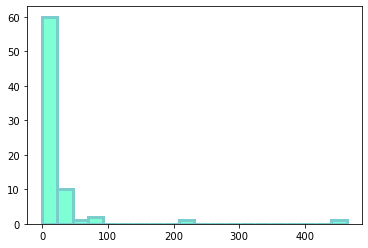

In [84]:
plt.hist(numeric_std , color="#7FFFD4" , ec="#79CDCD" , lw=3 , bins=20)

Most of the columns have standard deviation values that are smaller than 100. However, there are some with over 200 and even 400.

Let us compare the standard deviations of the columns that have the highest and the lowest standard deviation values.

In [86]:
pd.Series.sort_values(numeric_std , ascending=False)

apache_3j_diagnosis    463.266985
icu_id                 228.989661
d1_glucose_max          86.687955
apache_2_diagnosis      86.050882
hospital_id             62.854406
                          ...    
hepatic_failure          0.113229
gcs_unable_apache        0.097148
leukemia                 0.083763
lymphoma                 0.064148
aids                     0.029265
Name: std, Length: 75, dtype: float64

(array([9.092e+04, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 7.800e+01]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

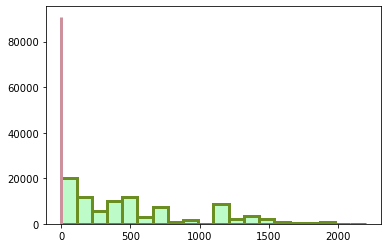

In [90]:
plt.hist(numeric_dataset["apache_3j_diagnosis"] , color="#BDFCC9" , ec="#6B8E23" , lw=3 , bins=20)
plt.hist(numeric_dataset["aids"] , color="#FFC0CB" , ec="#CD919E" , lw=3 , bins=20)

In order to balance this data, methods such as bootstrap is likely to be required.